Входные данные:



3 csv файла - каждый файл -- это координаты gps, где человек находился какое-|то время


##### Информация
##### latitude - Широта
##### longitude - Долгота
Timestamp
    - YYYY = year
    - MM = month of year
    - dd = day of month
    - HH=hourofday
    - mm = minute of hour
    - Z = timezone offset
Duration - продолжительность пребывания человека в локации в мс

## Задание 1
- Посещали пользователи одинаковые места? Знают ли они друг друга?
- Ввести метрику социальной активности - она должна учитывать количество мест, которое посетил пользователь, как далеко они друг от друга и как долго человек оставался там - метрика должна позволять сравнивать пользователей и находить наиболее активных

### задание 1.1. Посещали пользователи одинаковые места? Знают ли они друг друга?

In [1]:
!pip install geopy

In [2]:
import geopy.distance
from pandas import Timedelta
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

In [3]:
# Загружаем csv_files и сохраняим их как 3 разных датафрейма для каждого человека 
person_1 = pd.read_csv('/Users/andrey/Desktop/Study/task_python_sql/person.1.csv', sep=";")
person_2 = pd.read_csv('/Users/andrey/Desktop/Study/task_python_sql/person.2.csv', sep=";")
person_3 = pd.read_csv('/Users/andrey/Desktop/Study/task_python_sql/person.3.csv', sep=";")
person_1.head()

,latitude,longitude,start_time(YYYYMMddHHmmZ),duration(ms)
0,-49.326958,-72.89073,201312251147-0300,1186491
1,-49.326930,-72.89073,201312251213-0300,4393711
2,-49.316610,-72.89890,201312251358-0300,842939
3,-49.327160,-72.89072,201312251440-0300,211887
4,-49.326880,-72.89085,201312251631-0300,71166228


In [4]:
# Округляем значения для колонок: latitude и longitude для человека 1,2,3
accuracy = 4
# Я поставил округление до 4 знака после запятой, так-как это округление идет до метра
# максимальная погрешность около 10 метров. Это можно изменить корректируя параметр accuracy
person_1['latitude'] = np.round(person_1['latitude'], accuracy)
person_1['longitude'] = np.round(person_1['longitude'], accuracy)
person_2['latitude'] = np.round(person_2['latitude'], accuracy)
person_2['longitude'] = np.round(person_2['longitude'], accuracy)
person_3['latitude'] = np.round(person_3['latitude'], accuracy)
person_3['longitude'] = np.round(person_3['longitude'], accuracy)
person_1.head()

,latitude,longitude,start_time(YYYYMMddHHmmZ),duration(ms)
0,-49.3270,-72.8907,201312251147-0300,1186491
1,-49.3269,-72.8907,201312251213-0300,4393711
2,-49.3166,-72.8989,201312251358-0300,842939
3,-49.3272,-72.8907,201312251440-0300,211887
4,-49.3269,-72.8908,201312251631-0300,71166228


In [5]:
# Делаем inner join на датафреймах: person_1 и person_2 
person1_2=person_1.merge(person_2, on = ['latitude', 'longitude'])
# Меняем название колонок, чтобы легче было распознавать данные 
person1_2.rename(columns={'latitude': 'Latitude', 'longitude':'Longitude',
                          'start_time(YYYYMMddHHmmZ)_x': 'Person_1_start_time',
                          'start_time(YYYYMMddHHmmZ)_y': 'Person_2_start_time',
                          'duration(ms)_x': 'Person_1_duration(ms)',
                          'duration(ms)_y': 'Person_2_duration(ms)'}, inplace=True)
person1_2.head()

,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms),Person_2_start_time,Person_2_duration(ms)
0,51.2134,4.3912,201401090737+0100,30647,201312261211+0100,9620031
1,51.2134,4.3912,201402030718+0100,114454,201312261211+0100,9620031
2,51.2163,4.3941,201401141115+0100,13015908,201312281514+0100,4622480
3,51.2163,4.3941,201401141115+0100,13015908,201401031339+0100,9130580
4,51.2163,4.3941,201401141115+0100,13015908,201401060802+0100,35348180


In [6]:
# Меняем колонки:'Person_1_duration(ms)' и 'Person_2_duration(ms)' в формат timedelta
person1_2['Person_1_duration(ms)'] = pd.to_timedelta(person1_2['Person_1_duration(ms)'], unit = 'Ms')
person1_2['Person_2_duration(ms)'] = pd.to_timedelta(person1_2['Person_2_duration(ms)'], unit = 'Ms')
person1_2.head()

,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms),Person_2_start_time,Person_2_duration(ms)
0,51.2134,4.3912,201401090737+0100,0 days 00:00:30.647000,201312261211+0100,0 days 02:40:20.031000
1,51.2134,4.3912,201402030718+0100,0 days 00:01:54.454000,201312261211+0100,0 days 02:40:20.031000
2,51.2163,4.3941,201401141115+0100,0 days 03:36:55.908000,201312281514+0100,0 days 01:17:02.480000
3,51.2163,4.3941,201401141115+0100,0 days 03:36:55.908000,201401031339+0100,0 days 02:32:10.580000
4,51.2163,4.3941,201401141115+0100,0 days 03:36:55.908000,201401060802+0100,0 days 09:49:08.180000


In [7]:
# Меняем колонки:'Person_1_start_time' и 'Person_2_start_time' в формат datetime
person1_2['Person_1_start_time'] = pd.to_datetime(person1_2['Person_1_start_time'])
person1_2['Person_2_start_time'] = pd.to_datetime(person1_2['Person_2_start_time'])
person1_2.head()

,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms),Person_2_start_time,Person_2_duration(ms)
0,51.2134,4.3912,2014-01-09 07:37:00+01:00,0 days 00:00:30.647000,2013-12-26 12:11:00+01:00,0 days 02:40:20.031000
1,51.2134,4.3912,2014-02-03 07:18:00+01:00,0 days 00:01:54.454000,2013-12-26 12:11:00+01:00,0 days 02:40:20.031000
2,51.2163,4.3941,2014-01-14 11:15:00+01:00,0 days 03:36:55.908000,2013-12-28 15:14:00+01:00,0 days 01:17:02.480000
3,51.2163,4.3941,2014-01-14 11:15:00+01:00,0 days 03:36:55.908000,2014-01-03 13:39:00+01:00,0 days 02:32:10.580000
4,51.2163,4.3941,2014-01-14 11:15:00+01:00,0 days 03:36:55.908000,2014-01-06 08:02:00+01:00,0 days 09:49:08.180000


In [8]:
# Создаем колонку: end_time для датафрейма: person1_2
person1_2['Person_1_stop_time']=person1_2['Person_1_start_time'] + person1_2['Person_1_duration(ms)']
person1_2['Person_2_stop_time']=person1_2['Person_2_start_time'] + person1_2['Person_2_duration(ms)']
person1_2.head()

,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms),Person_2_start_time,Person_2_duration(ms),Person_1_stop_time,Person_2_stop_time
0,51.2134,4.3912,2014-01-09 07:37:00+01:00,0 days 00:00:30.647000,2013-12-26 12:11:00+01:00,0 days 02:40:20.031000,2014-01-09 07:37:30.647000+01:00,2013-12-26 14:51:20.031000+01:00
1,51.2134,4.3912,2014-02-03 07:18:00+01:00,0 days 00:01:54.454000,2013-12-26 12:11:00+01:00,0 days 02:40:20.031000,2014-02-03 07:19:54.454000+01:00,2013-12-26 14:51:20.031000+01:00
2,51.2163,4.3941,2014-01-14 11:15:00+01:00,0 days 03:36:55.908000,2013-12-28 15:14:00+01:00,0 days 01:17:02.480000,2014-01-14 14:51:55.908000+01:00,2013-12-28 16:31:02.480000+01:00
3,51.2163,4.3941,2014-01-14 11:15:00+01:00,0 days 03:36:55.908000,2014-01-03 13:39:00+01:00,0 days 02:32:10.580000,2014-01-14 14:51:55.908000+01:00,2014-01-03 16:11:10.580000+01:00
4,51.2163,4.3941,2014-01-14 11:15:00+01:00,0 days 03:36:55.908000,2014-01-06 08:02:00+01:00,0 days 09:49:08.180000,2014-01-14 14:51:55.908000+01:00,2014-01-06 17:51:08.180000+01:00


In [9]:
# Изменяем порядок колонок для датафрейма: person1_2
person1_2 = person1_2.reindex(columns=['Latitude', 'Longitude', 'Person_1_start_time',
                                       'Person_1_duration(ms)','Person_1_stop_time',
                                       'Person_2_start_time', 'Person_2_duration(ms)','Person_2_stop_time'])
person1_2.head()

,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms),Person_1_stop_time,Person_2_start_time,Person_2_duration(ms),Person_2_stop_time
0,51.2134,4.3912,2014-01-09 07:37:00+01:00,0 days 00:00:30.647000,2014-01-09 07:37:30.647000+01:00,2013-12-26 12:11:00+01:00,0 days 02:40:20.031000,2013-12-26 14:51:20.031000+01:00
1,51.2134,4.3912,2014-02-03 07:18:00+01:00,0 days 00:01:54.454000,2014-02-03 07:19:54.454000+01:00,2013-12-26 12:11:00+01:00,0 days 02:40:20.031000,2013-12-26 14:51:20.031000+01:00
2,51.2163,4.3941,2014-01-14 11:15:00+01:00,0 days 03:36:55.908000,2014-01-14 14:51:55.908000+01:00,2013-12-28 15:14:00+01:00,0 days 01:17:02.480000,2013-12-28 16:31:02.480000+01:00
3,51.2163,4.3941,2014-01-14 11:15:00+01:00,0 days 03:36:55.908000,2014-01-14 14:51:55.908000+01:00,2014-01-03 13:39:00+01:00,0 days 02:32:10.580000,2014-01-03 16:11:10.580000+01:00
4,51.2163,4.3941,2014-01-14 11:15:00+01:00,0 days 03:36:55.908000,2014-01-14 14:51:55.908000+01:00,2014-01-06 08:02:00+01:00,0 days 09:49:08.180000,2014-01-06 17:51:08.180000+01:00


In [10]:
# Фильтруем данные датафрейма: person1_2
person1_2 = person1_2.loc[((person1_2['Person_1_start_time']<=person1_2['Person_2_start_time']) & 
               (person1_2['Person_2_start_time']<=person1_2['Person_1_stop_time']))
             |
             ((person1_2['Person_1_start_time']>=person1_2['Person_2_start_time']) & 
               (person1_2['Person_2_stop_time']>=person1_2['Person_1_start_time']))]
person1_2.head()

,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms),Person_1_stop_time,Person_2_start_time,Person_2_duration(ms),Person_2_stop_time
99,51.2163,4.3941,2014-01-16 07:22:00+01:00,0 days 08:42:10.124000,2014-01-16 16:04:10.124000+01:00,2014-01-16 11:14:00+01:00,0 days 02:05:59.932000,2014-01-16 13:19:59.932000+01:00
170,51.2163,4.3941,2014-01-21 07:21:00+01:00,0 days 04:06:11.434000,2014-01-21 11:27:11.434000+01:00,2014-01-21 08:56:00+01:00,0 days 08:25:06.794000,2014-01-21 17:21:06.794000+01:00
193,51.2163,4.3941,2014-01-21 12:51:00+01:00,0 days 03:36:24.851000,2014-01-21 16:27:24.851000+01:00,2014-01-21 08:56:00+01:00,0 days 08:25:06.794000,2014-01-21 17:21:06.794000+01:00
217,51.2163,4.3941,2014-01-22 07:14:00+01:00,0 days 09:22:36.860000,2014-01-22 16:36:36.860000+01:00,2014-01-22 08:17:00+01:00,0 days 02:25:03.491000,2014-01-22 10:42:03.491000+01:00
242,51.2163,4.3941,2014-01-31 19:56:00+01:00,0 days 00:06:07.460000,2014-01-31 20:02:07.460000+01:00,2014-01-31 19:45:00+01:00,0 days 00:18:41.288000,2014-01-31 20:03:41.288000+01:00


In [11]:
# Расчитываем время, которое провели вместе два человека по данным датафрейма: person1_2
person1_2['max_start']=person1_2[['Person_1_start_time', 'Person_2_start_time']].max(axis=1)
person1_2['min_stop']=person1_2[['Person_1_stop_time', 'Person_2_stop_time']].min(axis=1)
person1_2['time_together']=person1_2['min_stop']-person1_2['max_start']
person1_2.head()

,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms),Person_1_stop_time,Person_2_start_time,Person_2_duration(ms),Person_2_stop_time,max_start,min_stop,time_together
99,51.2163,4.3941,2014-01-16 07:22:00+01:00,0 days 08:42:10.124000,2014-01-16 16:04:10.124000+01:00,2014-01-16 11:14:00+01:00,0 days 02:05:59.932000,2014-01-16 13:19:59.932000+01:00,2014-01-16 11:14:00+01:00,2014-01-16 13:19:59.932000+01:00,0 days 02:05:59.932000
170,51.2163,4.3941,2014-01-21 07:21:00+01:00,0 days 04:06:11.434000,2014-01-21 11:27:11.434000+01:00,2014-01-21 08:56:00+01:00,0 days 08:25:06.794000,2014-01-21 17:21:06.794000+01:00,2014-01-21 08:56:00+01:00,2014-01-21 11:27:11.434000+01:00,0 days 02:31:11.434000
193,51.2163,4.3941,2014-01-21 12:51:00+01:00,0 days 03:36:24.851000,2014-01-21 16:27:24.851000+01:00,2014-01-21 08:56:00+01:00,0 days 08:25:06.794000,2014-01-21 17:21:06.794000+01:00,2014-01-21 12:51:00+01:00,2014-01-21 16:27:24.851000+01:00,0 days 03:36:24.851000
217,51.2163,4.3941,2014-01-22 07:14:00+01:00,0 days 09:22:36.860000,2014-01-22 16:36:36.860000+01:00,2014-01-22 08:17:00+01:00,0 days 02:25:03.491000,2014-01-22 10:42:03.491000+01:00,2014-01-22 08:17:00+01:00,2014-01-22 10:42:03.491000+01:00,0 days 02:25:03.491000
242,51.2163,4.3941,2014-01-31 19:56:00+01:00,0 days 00:06:07.460000,2014-01-31 20:02:07.460000+01:00,2014-01-31 19:45:00+01:00,0 days 00:18:41.288000,2014-01-31 20:03:41.288000+01:00,2014-01-31 19:56:00+01:00,2014-01-31 20:02:07.460000+01:00,0 days 00:06:07.460000


In [12]:
# Подсчитываем сколько времени человек 1 и 2 провели вместе и как часто они встречались в каждом месте.
person1_2 = person1_2.groupby(['Latitude', 'Longitude']).agg({'time_together':['sum', 'count']})
person1_2

time_together      
                                      sum count
Latitude Longitude                             
51.2071  4.3871    0 days 21:03:25.808000     6
         4.3872    0 days 12:31:29.370000     3
51.2072  4.3872    0 days 01:22:19.039000     1
51.2128  4.3928    0 days 00:01:03.472000     1
51.2163  4.3941    0 days 23:13:23.311000    12
51.2185  4.4046    0 days 09:57:16.906000     2
51.2188  4.4044    0 days 00:37:27.357000     1

In [13]:
# Высчитываем сколько времени человек 1 провел в каждом месте и как часто он там был.
person1_2 = person1_2.reset_index()
person_1_duration = person_1.groupby(['latitude', 'longitude']).agg({'duration(ms)':['sum', 'count']})
# Меняем колонку: 'duration(ms) - sum' в формат timedelta
person_1_duration['duration(ms)', 'sum'] = pd.to_timedelta(person_1_duration['duration(ms)', 'sum'], unit = 'Ms')
# Делаем inner join на датафреймах: person_1_duration и person1_2
person_1_2_durations = person_1_duration.merge(person1_2, left_on = ['latitude', 'longitude'],
                                               right_on=['Latitude', 'Longitude'])
# Изменяем название колонок для датафрейма: person_1_2_durations
person_1_2_durations.columns=['Duration_1_sum', 'Count_1', 'Latitude', 
                              'Longitude', 'Time_together_sum', 'Time_together_count']
# Высчитываем сколько времени человек 2 провел в каждом месте и как часто он там был.
person_2_duration =  person_2.groupby(['latitude', 'longitude']).agg({'duration(ms)':['sum', 'count']})
# Меняем колонку: 'duration(ms) - sum' в формат timedelta
person_2_duration['duration(ms)', 'sum'] = pd.to_timedelta(person_2_duration['duration(ms)', 'sum'], unit = 'Ms')
# Делаем inner join на датафреймах: person_2_duration и person_1_2_durations
person_1_2_durations = person_2_duration.merge(person_1_2_durations, left_on = ['latitude', 'longitude'],
                                               right_on=['Latitude', 'Longitude'])
# Изменяем название колонок для датафрейма: person_1_2_durations
person_1_2_durations.columns=['Duration_2_sum','Count_2','Duration_1_sum', 'Count_1', 'Latitude', 
                              'Longitude', 'Time_together_sum', 'Time_together_count']
# Изменяем местоположение колонок для датафрейма: person_1_2_durations
person_1_2_durations = person_1_2_durations.reindex(columns=['Latitude', 'Longitude', 'Duration_1_sum',
                                       'Count_1','Duration_2_sum',
                                       'Count_2', 'Time_together_sum','Time_together_count'])
person_1_2_durations

/var/folders/wb/vcwt3n7x3tld8m8hg342w5gr0000gn/T/ipykernel_6267/3434390768.py:17: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  person_1_2_durations = person_2_duration.merge(person_1_2_durations, left_on = ['latitude', 'longitude'],


,Latitude,Longitude,Duration_1_sum,Count_1,Duration_2_sum,Count_2,Time_together_sum,Time_together_count
0,51.2071,4.3871,1 days 12:31:31.814000,8,2 days 01:58:16.283000,9,0 days 21:03:25.808000,6
1,51.2071,4.3872,1 days 10:45:07.360000,6,0 days 23:54:49.181000,3,0 days 12:31:29.370000,3
2,51.2072,4.3872,0 days 02:59:42.236000,1,0 days 01:22:19.039000,1,0 days 01:22:19.039000,1
3,51.2128,4.3928,0 days 00:08:58.710000,2,0 days 00:01:03.472000,1,0 days 00:01:03.472000,1
4,51.2163,4.3941,5 days 01:18:10.839000,26,3 days 15:59:13.982000,23,0 days 23:13:23.311000,12
5,51.2185,4.4046,0 days 13:27:16.906000,2,0 days 19:22:44.339000,3,0 days 09:57:16.906000,2
6,51.2188,4.4044,0 days 09:01:31.663000,1,0 days 00:54:27.357000,1,0 days 00:37:27.357000,1


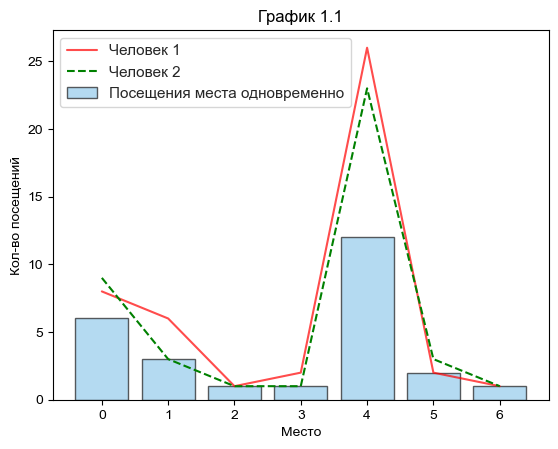

In [14]:
# Строим график, который показывает сколько раз в каждое место приезжал человек 1 и человек 2, и сколько 
# раз они там были в одно и тоже время
fig, ax = plt.subplots()
sns.set_theme(style="white")
sns.barplot(data=person_1_2_durations, x=person_1_2_durations.index.values, 
                    ax=ax, y='Time_together_count', edgecolor=".1", color='lightskyblue', 
                alpha=0.7, label='Посещения места одновременно')
sns.lineplot(data=person_1_2_durations, x=person_1_2_durations.index.values, ax=ax, 
             y='Count_1', color='red', alpha=0.7, label='Человек 1') 
sns.lineplot(data=person_1_2_durations, x=person_1_2_durations.index.values, ax=ax, 
             y='Count_2', color='green', alpha=1, linestyle='dashed', label='Человек 2')
ax.set(xlabel='Место', ylabel='Кол-во посещений')
ax.set_title('График 1.1')
plt.show()

#### Мы видим на графике 1.1, что те места в которых были человек 1 и человек 2 одновременно практически не посещались ими (кроме места: 4), когда другого человека там не было. Из этого можно предположить, что они эти места посещали, чтобы увидеться друг другом. 

In [15]:
# Делим полученные нами total_seconds, чтобы получить кол-во минут, которое провели в разных местах 
# человек 1, человек 2. В том числе, чтобы вычислить кол-во минут сколько они в этих местах провели одновременно
person_1_2_durations['Duration_1_sum'] = person_1_2_durations['Duration_1_sum'].dt.total_seconds()
person_1_2_durations['Duration_2_sum'] = person_1_2_durations['Duration_2_sum'].dt.total_seconds()
person_1_2_durations['Time_together_sum'] = person_1_2_durations['Time_together_sum'].dt.total_seconds()
person_1_2_durations['Duration_1_sum'] = person_1_2_durations['Duration_1_sum'].div(60)
person_1_2_durations['Duration_2_sum'] = person_1_2_durations['Duration_2_sum'].div(60)
person_1_2_durations['Time_together_sum'] = person_1_2_durations['Time_together_sum'].div(60)
person_1_2_durations

,Latitude,Longitude,Duration_1_sum,Count_1,Duration_2_sum,Count_2,Time_together_sum,Time_together_count
0,51.2071,4.3871,2191.530233,8,2998.271383,9,1263.430133,6
1,51.2071,4.3872,2085.122667,6,1434.819683,3,751.489500,3
2,51.2072,4.3872,179.703933,1,82.317317,1,82.317317,1
3,51.2128,4.3928,8.978500,2,1.057867,1,1.057867,1
4,51.2163,4.3941,7278.180650,26,5279.233033,23,1393.388517,12
5,51.2185,4.4046,807.281767,2,1162.738983,3,597.281767,2
6,51.2188,4.4044,541.527717,1,54.455950,1,37.455950,1


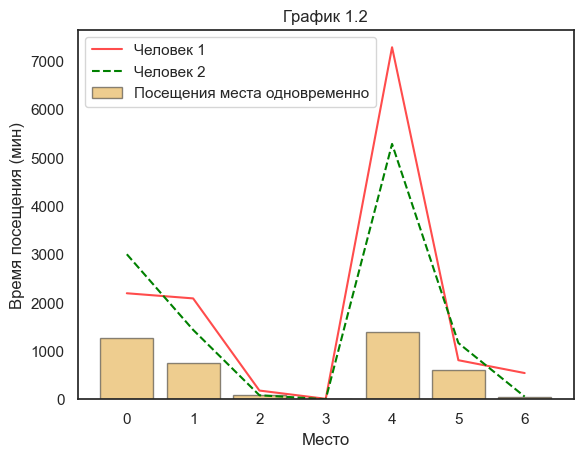

In [16]:
# Строим график, который показывает сколько времени в каждом месте провел человек 1 и человек 2, и сколько  
# они провели времени в этих местах в одно и тоже время  
fig, ax = plt.subplots()
sns.set_theme(style="white")
sns.barplot(data=person_1_2_durations, x=person_1_2_durations.index.values, 
                    ax=ax, y='Time_together_sum', edgecolor=".1", color='orange', 
                alpha=0.5, label='Посещения места одновременно')
sns.lineplot(data=person_1_2_durations, x=person_1_2_durations.index.values, ax=ax, 
             y='Duration_1_sum', color='red', alpha=0.7, label='Человек 1') 
sns.lineplot(data=person_1_2_durations, x=person_1_2_durations.index.values, ax=ax, 
             y='Duration_2_sum', color='green', alpha=1, linestyle='dashed', 
             label='Человек 2')
ax.set(xlabel='Место', ylabel='Время посещения (мин)')
ax.set_title('График 1.2')
plt.show()

#### Мы видим на графике 1.2, что большую часть времени (кроме место: 4), которое человек 1 и человек 2 тратили на посещение этих мест, было тогда, когда они оба там были одновременно. Из этого можно предположить, что они эти места посещали, чтобы увидеться друг другом. 

### ВЫВОД: высокая вероятность  того, что человек 1 и человек 2 знакомы


In [17]:
# В целях оптимизации строим функцию, которое позволит нам повторить те же самые расчеты для пары людей 1,3 и 2,3 
def function(person_1, person_2): 
    person1_2=person_1.merge(person_2, on = ['latitude', 'longitude']) 
    person1_2.rename(columns={'latitude': 'Latitude', 'longitude':'Longitude',
                          'start_time(YYYYMMddHHmmZ)_x': 'Person_1_start_time',
                          'start_time(YYYYMMddHHmmZ)_y': 'Person_2_start_time',
                          'duration(ms)_x': 'Person_1_duration(ms)',
                          'duration(ms)_y': 'Person_2_duration(ms)'}, inplace=True)
    person1_2['Person_1_duration(ms)'] = pd.to_timedelta(person1_2['Person_1_duration(ms)'], unit = 'Ms')
    person1_2['Person_2_duration(ms)'] = pd.to_timedelta(person1_2['Person_2_duration(ms)'], unit = 'Ms')
    person1_2['Person_1_start_time'] = pd.to_datetime(person1_2['Person_1_start_time'])
    person1_2['Person_2_start_time'] = pd.to_datetime(person1_2['Person_2_start_time'])
    person1_2['Person_1_stop_time']=person1_2['Person_1_start_time'] + person1_2['Person_1_duration(ms)']
    person1_2['Person_2_stop_time']=person1_2['Person_2_start_time'] + person1_2['Person_2_duration(ms)']
    person1_2 = person1_2.reindex(columns=['Latitude', 'Longitude', 'Person_1_start_time',
                                           'Person_1_duration(ms)','Person_1_stop_time',
                                           'Person_2_start_time', 'Person_2_duration(ms)','Person_2_stop_time'])
    person1_2 = person1_2.loc[((person1_2['Person_1_start_time']<=person1_2['Person_2_start_time']) & 
                   (person1_2['Person_2_start_time']<=person1_2['Person_1_stop_time']))
                 |
                 ((person1_2['Person_1_start_time']>=person1_2['Person_2_start_time']) & 
                   (person1_2['Person_2_stop_time']>=person1_2['Person_1_start_time']))]
    person1_2['max_start']=person1_2[['Person_1_start_time', 'Person_2_start_time']].max(axis=1)
    person1_2['min_stop']=person1_2[['Person_1_stop_time', 'Person_2_stop_time']].min(axis=1)
    person1_2['time_together']=person1_2['min_stop']-person1_2['max_start']
    person1_2 = person1_2.groupby(['Latitude', 'Longitude']).agg({'time_together':['sum', 'count']})
    person1_2 = person1_2.reset_index()
    person_1_duration = person_1.groupby(['latitude', 'longitude']).agg({'duration(ms)':['sum', 'count']})
    person_1_duration['duration(ms)', 'sum'] = pd.to_timedelta(person_1_duration['duration(ms)', 'sum'], 
                                                               unit = 'Ms')
    person_1_2_durations = person_1_duration.merge(person1_2, left_on = ['latitude', 'longitude'],
                                                   right_on=['Latitude', 'Longitude'])
    person_1_2_durations.columns=['Duration_1_sum', 'Count_1', 'Latitude', 
                                  'Longitude', 'Time_together_sum', 'Time_together_count']
    person_2_duration =  person_2.groupby(['latitude', 'longitude']).agg({'duration(ms)':['sum', 'count']})
    person_2_duration['duration(ms)', 'sum'] = pd.to_timedelta(person_2_duration['duration(ms)', 'sum'], 
                                                               unit = 'Ms')
    person_1_2_durations = person_2_duration.merge(person_1_2_durations, left_on = ['latitude', 'longitude'],
                                                   right_on=['Latitude', 'Longitude'])
    person_1_2_durations.columns=['Duration_2_sum','Count_2','Duration_1_sum', 'Count_1', 'Latitude', 
                                  'Longitude', 'Time_together_sum', 'Time_together_count']
    person_1_2_durations = person_1_2_durations.reindex(columns=['Latitude', 'Longitude', 'Duration_1_sum',
                                           'Count_1','Duration_2_sum',
                                           'Count_2', 'Time_together_sum','Time_together_count'])
    return person_1_2_durations

In [18]:
# Используем нашу функцию, чтобы провети все предыдущие расчеты для пары человек 2 и человек 3.
# Полученный датафрейм сохраняем как person_2_3_durations 
person_2_3_durations = function(person_2, person_3)
person_2_3_durations.rename(columns={'Duration_1_sum': 'Duration_2_sum',
                          'Count_1': 'Count_2',
                          'Duration_2_sum': 'Duration_3_sum',
                          'Count_2': 'Count_3'}, inplace=True)
person_2_3_durations

/var/folders/wb/vcwt3n7x3tld8m8hg342w5gr0000gn/T/ipykernel_6267/3631085496.py:38: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  person_1_2_durations = person_2_duration.merge(person_1_2_durations, left_on = ['latitude', 'longitude'],


,Latitude,Longitude,Duration_2_sum,Count_2,Duration_3_sum,Count_3,Time_together_sum,Time_together_count
0,51.1690,4.3865,0 days 00:07:47.053000,1,0 days 00:10:51.124000,1,0 days 00:07:47.053000,1
1,51.2070,4.3872,0 days 06:29:52.970000,1,0 days 00:05:04.971000,1,0 days 00:05:04.971000,1
2,51.2071,4.3871,2 days 01:58:16.283000,9,1 days 08:00:02.913000,7,0 days 23:48:39.727000,4
3,51.2071,4.3872,0 days 23:54:49.181000,3,1 days 10:01:30.663000,7,0 days 21:45:13.339000,3
4,51.2072,4.3869,0 days 20:32:58.719000,7,0 days 08:43:25.747000,4,0 days 02:02:16.972000,1
5,51.2073,4.3877,0 days 00:06:01.259000,2,0 days 04:42:45.097000,1,0 days 00:02:00.223000,1
6,51.2163,4.3941,3 days 15:59:13.982000,23,2 days 14:29:00.639000,10,0 days 17:09:37.747000,6
7,51.2163,4.3942,4 days 04:14:50.421000,20,1 days 20:20:20.621000,8,0 days 07:03:12.243000,1
8,51.2185,4.4045,0 days 09:13:09.667000,2,0 days 16:41:26.781000,2,0 days 07:56:49.867000,2


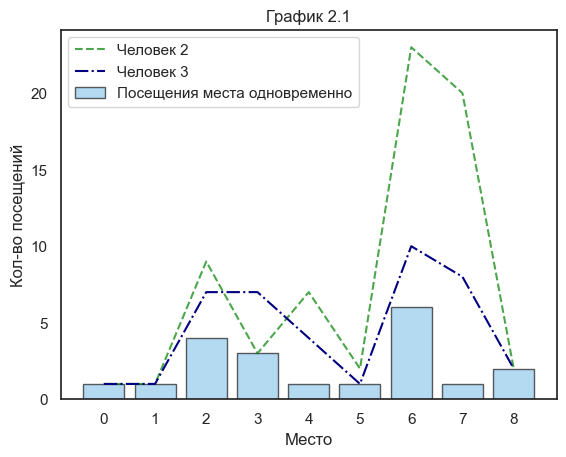

In [19]:
# Строим график, который показывает сколько раз в каждое место приезжал человек 2 и человек 3, и сколько 
# раз они там были в одно и тоже время
fig, ax = plt.subplots()
sns.set_theme(style="white")
sns.barplot(data=person_2_3_durations, x=person_2_3_durations.index.values, 
                    ax=ax, y='Time_together_count', edgecolor=".1", color='lightskyblue', 
                alpha=0.7, label='Посещения места одновременно')
sns.lineplot(data=person_2_3_durations, x=person_2_3_durations.index.values, ax=ax, 
             y='Count_2', color='green', alpha=0.7, linestyle='dashed', label='Человек 2') 
sns.lineplot(data=person_2_3_durations, x=person_2_3_durations.index.values, ax=ax, 
             y='Count_3', color='navy', linestyle='dashdot', alpha=1, label='Человек 3')
ax.set(xlabel='Место', ylabel='Кол-во посещений')
ax.set_title('График 2.1')
plt.show()

#### Мы видим на графике 2.1, что те места в которых были человек 2 и человек 3 одновременно практически не посещались ими (кроме места: 7), когда другого человека там не было. Из этого можно предположить, что они эти места посещали, чтобы увидеться друг другом. 

In [20]:
# Делим полученные нами total_seconds, чтобы получить кол-во минут, которое провели в разных местах 
# человек 2, человек 3. В том числе, чтобы вычислить кол-во минут сколько они в этих местах провели одновременно
person_2_3_durations['Duration_2_sum'] = person_2_3_durations['Duration_2_sum'].dt.total_seconds()
person_2_3_durations['Duration_3_sum'] = person_2_3_durations['Duration_3_sum'].dt.total_seconds()
person_2_3_durations['Time_together_sum'] = person_2_3_durations['Time_together_sum'].dt.total_seconds()
person_2_3_durations['Duration_2_sum'] = person_2_3_durations['Duration_2_sum'].div(60)
person_2_3_durations['Duration_3_sum'] = person_2_3_durations['Duration_3_sum'].div(60)
person_2_3_durations['Time_together_sum'] = person_2_3_durations['Time_together_sum'].div(60)
person_2_3_durations

,Latitude,Longitude,Duration_2_sum,Count_2,Duration_3_sum,Count_3,Time_together_sum,Time_together_count
0,51.1690,4.3865,7.784217,1,10.852067,1,7.784217,1
1,51.2070,4.3872,389.882833,1,5.082850,1,5.082850,1
2,51.2071,4.3871,2998.271383,9,1920.048550,7,1428.662117,4
3,51.2071,4.3872,1434.819683,3,2041.511050,7,1305.222317,3
4,51.2072,4.3869,1232.978650,7,523.429117,4,122.282867,1
5,51.2073,4.3877,6.020983,2,282.751617,1,2.003717,1
6,51.2163,4.3941,5279.233033,23,3749.010650,10,1029.629117,6
7,51.2163,4.3942,6014.840350,20,2660.343683,8,423.204050,1
8,51.2185,4.4045,553.161117,2,1001.446350,2,476.831117,2


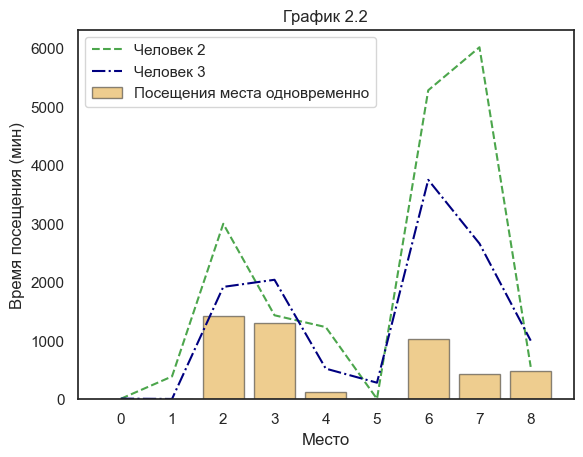

In [21]:
# Строим график, который показывает сколько времени в каждом месте провел человек 1 и человек 2, и сколько  
# они провели времени в этих местах в одно и тоже время
fig, ax = plt.subplots()
sns.set_theme(style="white")
sns.barplot(data=person_2_3_durations, x=person_2_3_durations.index.values, 
                    ax=ax, y='Time_together_sum', edgecolor=".1", color='orange', 
                alpha=0.5, label='Посещения места одновременно')
sns.lineplot(data=person_2_3_durations, x=person_2_3_durations.index.values, ax=ax, 
             y='Duration_2_sum', color='green', alpha=0.7, linestyle='dashed', label='Человек 2') 
sns.lineplot(data=person_2_3_durations, x=person_2_3_durations.index.values, ax=ax, 
             y='Duration_3_sum', color='navy', alpha=1, linestyle='dashdot', label='Человек 3')
ax.set(xlabel='Место', ylabel='Время посещения (мин)')
ax.set_title('График 2.2')
plt.show()

#### Мы видим на графике 2.2, что большую часть времени (кроме мест: 6 и 7 ), которое человек 1 и человек 2 тратили на посещение этих мест, было тогда, когда они оба там были одновременно. Из этого можно предположить, что они эти места посещали, чтобы увидеться друг другом. 

### ВЫВОД: высокая вероятность  того, что человек 2 и человек 3 знакомы

In [22]:
# Используем нашу функцию, чтобы провети все предыдущие расчеты для пары человек 1 и человек 3.
# Полученный датафрейм сохраняем как person_2_3_durations 
person_1_3_durations = function(person_1, person_3)
person_1_3_durations.rename(columns={'Duration_2_sum': 'Duration_3_sum',
                          'Count_2': 'Count_3',}, inplace=True)
person_1_3_durations

/var/folders/wb/vcwt3n7x3tld8m8hg342w5gr0000gn/T/ipykernel_6267/3631085496.py:38: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  person_1_2_durations = person_2_duration.merge(person_1_2_durations, left_on = ['latitude', 'longitude'],


,Latitude,Longitude,Duration_1_sum,Count_1,Duration_3_sum,Count_3,Time_together_sum,Time_together_count
0,51.2071,4.3871,1 days 12:31:31.814000,8,1 days 08:00:02.913000,7,0 days 13:39:06.020000,2
1,51.2071,4.3872,1 days 10:45:07.360000,6,1 days 10:01:30.663000,7,0 days 13:57:22.933000,5
2,51.2084,4.3874,0 days 00:09:05.019000,1,0 days 00:09:39.495000,1,0 days 00:09:05.019000,1
3,51.2163,4.3941,5 days 01:18:10.839000,26,2 days 14:29:00.639000,10,1 days 10:38:56.560000,9
4,51.2163,4.3942,0 days 09:23:09.835000,2,1 days 20:20:20.621000,8,0 days 00:20:54.228000,1


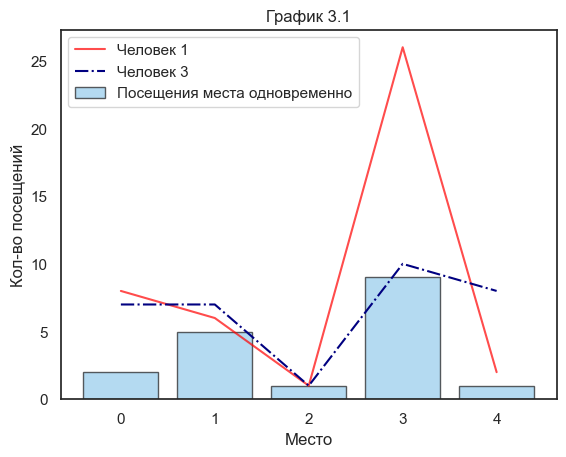

In [23]:
# Строим график, который показывает сколько раз в каждое место приезжал человек 1 и человек 3, и сколько 
# раз они там были в одно и тоже время
fig, ax = plt.subplots()
sns.set_theme(style="white")
sns.barplot(data=person_1_3_durations, x=person_1_3_durations.index.values, 
                    ax=ax, y='Time_together_count', edgecolor=".1", color='lightskyblue', 
                alpha=0.7, label='Посещения места одновременно')
sns.lineplot(data=person_1_3_durations, x=person_1_3_durations.index.values, ax=ax, 
             y='Count_1', color='red', alpha=0.7, label='Человек 1') 
sns.lineplot(data=person_1_3_durations, x=person_1_3_durations.index.values, ax=ax, 
             y='Count_3', color='navy', alpha=1, linestyle='dashdot', label='Человек 3')
ax.set(xlabel='Место', ylabel='Кол-во посещений')
ax.set_title('График 3.1')
plt.show()

#### Мы видим на графике 3.1, что те места в которых были человек 1 и человек 3 одновременно значительное кол-во раз посещались ими именного тогда, когда они оба там были. Из этого можно предположить, что они эти места посещали, чтобы увидеться друг другом. 

In [24]:
# Делим полученные нами total_seconds, чтобы получить кол-во минут, которое провели в разных местах 
# человек 1, человек 3. В том числе, чтобы вычислить кол-во минут сколько они в этих местах провели одновременно
person_1_3_durations['Duration_1_sum'] = person_1_3_durations['Duration_1_sum'].dt.total_seconds()
person_1_3_durations['Duration_3_sum'] = person_1_3_durations['Duration_3_sum'].dt.total_seconds()
person_1_3_durations['Time_together_sum'] = person_1_3_durations['Time_together_sum'].dt.total_seconds()
person_1_3_durations['Duration_1_sum'] = person_1_3_durations['Duration_1_sum'].div(60)
person_1_3_durations['Duration_3_sum'] = person_1_3_durations['Duration_3_sum'].div(60)
person_1_3_durations['Time_together_sum'] = person_1_3_durations['Time_together_sum'].div(60)
person_1_3_durations

,Latitude,Longitude,Duration_1_sum,Count_1,Duration_3_sum,Count_3,Time_together_sum,Time_together_count
0,51.2071,4.3871,2191.530233,8,1920.048550,7,819.100333,2
1,51.2071,4.3872,2085.122667,6,2041.511050,7,837.382217,5
2,51.2084,4.3874,9.083650,1,9.658250,1,9.083650,1
3,51.2163,4.3941,7278.180650,26,3749.010650,10,2078.942667,9
4,51.2163,4.3942,563.163917,2,2660.343683,8,20.903800,1


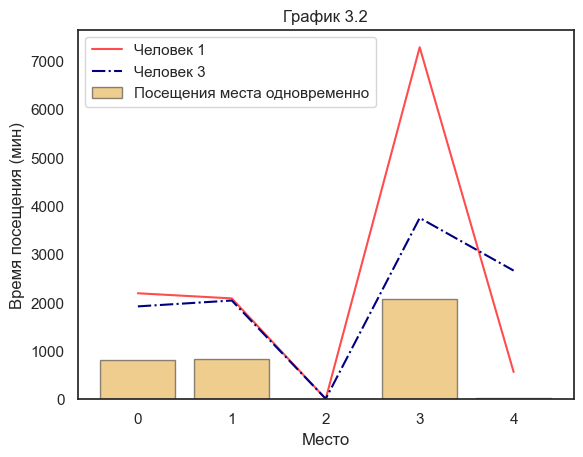

In [25]:
# Строим график, который показывает сколько времени в каждом месте провел человек 1 и человек 3, и сколько  
# они провели времени в этих местах в одно и тоже время
fig, ax = plt.subplots()
sns.set_theme(style="white")
sns.barplot(data=person_1_3_durations, x=person_1_3_durations.index.values, 
                    ax=ax, y='Time_together_sum', edgecolor=".1", color='orange', 
                alpha=0.5, label='Посещения места одновременно')
sns.lineplot(data=person_1_3_durations, x=person_1_3_durations.index.values, ax=ax, 
             y='Duration_1_sum', color='red', alpha=0.7, label='Человек 1') 
sns.lineplot(data=person_1_3_durations, x=person_1_3_durations.index.values, ax=ax, 
             y='Duration_3_sum', color='navy', alpha=1, linestyle='dashdot', label='Человек 3')
ax.set(xlabel='Место', ylabel='Время посещения (мин)')
ax.set_title('График 3.2')
plt.show()

#### Мы видим на графике 3.2, что значительную часть времени (кроме места: 4), которое человек 1 и человек 2 тратили на посещение этих мест, было тогда, когда они оба там были одновременно. Из этого можно предположить, что они эти места посещали, чтобы увидеться друг другом. 

### Вывод: есть повод предпологать, что человек 1 и человек 3 знакомы, но стоит учитывать, что из всех пар человек. У этой пары меньше всего посящяемых мест, в которых они были оба

# -----------------------------------------------------------------------------------------

### задание 1.2. Ввести метрику социальной активности - она должна учитывать количество мест, которое посетил пользователь, как далеко они друг от друга и как долго человек оставался там - метрика должна позволять сравнивать пользователей и находить наиболее активных

### Делаем рассчеты показателей для человека 1

In [26]:
# Меняем название колонок для датафрейма: person_1, чтобы легче было распознавать данные 
person_1.rename(columns={'latitude': 'Latitude', 'longitude':'Longitude',
                          'start_time(YYYYMMddHHmmZ)': 'Person_1_start_time',
                          'duration(ms)': 'Person_1_duration(ms)'}, inplace=True)
person_1.head()

,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms)
0,-49.3270,-72.8907,201312251147-0300,1186491
1,-49.3269,-72.8907,201312251213-0300,4393711
2,-49.3166,-72.8989,201312251358-0300,842939
3,-49.3272,-72.8907,201312251440-0300,211887
4,-49.3269,-72.8908,201312251631-0300,71166228


In [27]:
# Меняем колонки:'Person_1_duration(ms)' в формат timedelta
person_1['Person_1_duration(ms)'] = pd.to_timedelta(person_1['Person_1_duration(ms)'], unit = 'Ms')
person_1.head()

,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms)
0,-49.3270,-72.8907,201312251147-0300,0 days 00:19:46.491000
1,-49.3269,-72.8907,201312251213-0300,0 days 01:13:13.711000
2,-49.3166,-72.8989,201312251358-0300,0 days 00:14:02.939000
3,-49.3272,-72.8907,201312251440-0300,0 days 00:03:31.887000
4,-49.3269,-72.8908,201312251631-0300,0 days 19:46:06.228000


In [28]:
# Меняем колонки:'Person_1_start_time' в формат datetime
person_1['Person_1_start_time'] = pd.to_datetime(person_1['Person_1_start_time'])
person_1.head()

,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms)
0,-49.3270,-72.8907,2013-12-25 11:47:00-03:00,0 days 00:19:46.491000
1,-49.3269,-72.8907,2013-12-25 12:13:00-03:00,0 days 01:13:13.711000
2,-49.3166,-72.8989,2013-12-25 13:58:00-03:00,0 days 00:14:02.939000
3,-49.3272,-72.8907,2013-12-25 14:40:00-03:00,0 days 00:03:31.887000
4,-49.3269,-72.8908,2013-12-25 16:31:00-03:00,0 days 19:46:06.228000


In [29]:
# Создаем колонку: end_time для датафрейма: person_1
person_1['Person_1_stop_time']=person_1['Person_1_start_time'] + person_1['Person_1_duration(ms)']
person_1.head()

/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  warnings.warn(


,Latitude,Longitude,Person_1_start_time,Person_1_duration(ms),Person_1_stop_time
0,-49.3270,-72.8907,2013-12-25 11:47:00-03:00,0 days 00:19:46.491000,2013-12-25 12:06:46.491000-03:00
1,-49.3269,-72.8907,2013-12-25 12:13:00-03:00,0 days 01:13:13.711000,2013-12-25 13:26:13.711000-03:00
2,-49.3166,-72.8989,2013-12-25 13:58:00-03:00,0 days 00:14:02.939000,2013-12-25 14:12:02.939000-03:00
3,-49.3272,-72.8907,2013-12-25 14:40:00-03:00,0 days 00:03:31.887000,2013-12-25 14:43:31.887000-03:00
4,-49.3269,-72.8908,2013-12-25 16:31:00-03:00,0 days 19:46:06.228000,2013-12-26 12:17:06.228000-03:00


In [30]:
# Расчитываем расстояние между местом прибывания и предыдущим местом для человека 1
person_1['Next_latitude'] = person_1['Latitude'].shift(1)
person_1['Next_longitude'] = person_1['Longitude'].shift(1)
Person_1_km = person_1.loc[1:].apply(lambda x: geopy.distance.geodesic(
    [x['Latitude'], x['Longitude']], [x['Next_latitude'], x['Next_longitude']]).km ,axis=1).mean()
Person_1_km

34.68348866855221

In [31]:
#Подсчитываем сколько времени человек 1 провел в каждом месте и сколько раз он был в разных местах.
person_1 = person_1.groupby(['Latitude', 'Longitude']).agg({'Person_1_duration(ms)':['sum', 'count']})
person_1.head()

Person_1_duration(ms)      
                                      sum count
Latitude Longitude                             
-54.8668 -68.2509  0 days 00:07:02.426000     1
-54.8553 -68.2192  0 days 00:10:26.783000     1
-54.8551 -68.5778  0 days 00:03:18.780000     1
-54.8469 -68.4809  0 days 00:11:52.881000     1
-54.8393 -68.3127  0 days 01:37:32.025000     1

In [32]:
# Меняем название колонок для датафрейма: person_1
person_1.columns=['Duration_person_1_sum', 'Count_person_1']
person_1 = person_1.reset_index()
person_1.head()

,Latitude,Longitude,Duration_person_1_sum,Count_person_1
0,-54.8668,-68.2509,0 days 00:07:02.426000,1
1,-54.8553,-68.2192,0 days 00:10:26.783000,1
2,-54.8551,-68.5778,0 days 00:03:18.780000,1
3,-54.8469,-68.4809,0 days 00:11:52.881000,1
4,-54.8393,-68.3127,0 days 01:37:32.025000,1


In [33]:
# Расчитываем кол-во разных мест в которых был человек 1
diff_place_1 = len(person_1)

In [34]:
# Расчитываем сколько раз куда-то ездил/ходил человек 1
person_1_place_sum = person_1['Count_person_1'].agg('sum')
person_1_place_sum

549

In [35]:
# Расчитываем среднее продолжительность времени, которое человек 1 проводил в месте, когда туда приезжал/приходил
#(в минутах)
person_1_place_mean = person_1['Duration_person_1_sum'].mean()
t_integer = int(person_1_place_mean.total_seconds())
person_1_place_mean_minutes = t_integer/60
person_1_place_mean_minutes

263.4

### Делаем рассчеты показателей для человека 2

In [36]:
# Меняем название колонок для датафрейма: person_2, чтобы легче было распознавать данные 
person_2 = person_2.rename(columns={'latitude': 'Latitude', 'longitude':'Longitude',
                          'start_time(YYYYMMddHHmmZ)': 'Person_2_start_time',
                          'duration(ms)': 'Person_2_duration(ms)'})
person_2.head()

,Latitude,Longitude,Person_2_start_time,Person_2_duration(ms)
0,51.0570,3.7145,201312250036+0100,19593588
1,51.0570,3.7147,201312250608+0100,30460679
2,51.0384,3.7297,201312251451+0100,964169
3,50.8802,4.2511,201312251514+0100,262475
4,50.8617,4.4750,201312251524+0100,64461


In [37]:
# Меняем колонки:'Person_2_duration(ms)' в формат timedelta
person_2['Person_2_duration(ms)'] = pd.to_timedelta(person_2['Person_2_duration(ms)'], unit = 'Ms')
person_2.head()

,Latitude,Longitude,Person_2_start_time,Person_2_duration(ms)
0,51.0570,3.7145,201312250036+0100,0 days 05:26:33.588000
1,51.0570,3.7147,201312250608+0100,0 days 08:27:40.679000
2,51.0384,3.7297,201312251451+0100,0 days 00:16:04.169000
3,50.8802,4.2511,201312251514+0100,0 days 00:04:22.475000
4,50.8617,4.4750,201312251524+0100,0 days 00:01:04.461000


In [38]:
# Меняем колонки:'Person_2_start_time' в формат datetime
person_2['Person_2_start_time'] = pd.to_datetime(person_2['Person_2_start_time'])
person_2.head()

,Latitude,Longitude,Person_2_start_time,Person_2_duration(ms)
0,51.0570,3.7145,2013-12-25 00:36:00+01:00,0 days 05:26:33.588000
1,51.0570,3.7147,2013-12-25 06:08:00+01:00,0 days 08:27:40.679000
2,51.0384,3.7297,2013-12-25 14:51:00+01:00,0 days 00:16:04.169000
3,50.8802,4.2511,2013-12-25 15:14:00+01:00,0 days 00:04:22.475000
4,50.8617,4.4750,2013-12-25 15:24:00+01:00,0 days 00:01:04.461000


In [39]:
# Создаем колонку: end_time для датафрейма: person_2
person_2['Person_2_stop_time']=person_2['Person_2_start_time'] + person_2['Person_2_duration(ms)']
person_2.head()

,Latitude,Longitude,Person_2_start_time,Person_2_duration(ms),Person_2_stop_time
0,51.0570,3.7145,2013-12-25 00:36:00+01:00,0 days 05:26:33.588000,2013-12-25 06:02:33.588000+01:00
1,51.0570,3.7147,2013-12-25 06:08:00+01:00,0 days 08:27:40.679000,2013-12-25 14:35:40.679000+01:00
2,51.0384,3.7297,2013-12-25 14:51:00+01:00,0 days 00:16:04.169000,2013-12-25 15:07:04.169000+01:00
3,50.8802,4.2511,2013-12-25 15:14:00+01:00,0 days 00:04:22.475000,2013-12-25 15:18:22.475000+01:00
4,50.8617,4.4750,2013-12-25 15:24:00+01:00,0 days 00:01:04.461000,2013-12-25 15:25:04.461000+01:00


In [40]:
# Расчитываем расстояние между местом прибывания и предыдущим местом для человека 3
person_2['Next_latitude'] = person_2['Latitude'].shift(1)
person_2['Next_longitude'] = person_2['Longitude'].shift(1)
Person_2_km = person_2.loc[1:].apply(lambda x: geopy.distance.geodesic(
    [x['Latitude'], x['Longitude']], [x['Next_latitude'], x['Next_longitude']]).km ,axis=1).mean()
Person_2_km

3.454118073069264

In [41]:
# Подсчитываем сколько времени человек 2 провел в каждом месте и сколько раз он был в разных местах.
person_2 = person_2.groupby(['Latitude', 'Longitude']).agg({'Person_2_duration(ms)':['sum', 'count']})
person_2.head()

Person_2_duration(ms)      
                                      sum count
Latitude Longitude                             
50.8114  4.3835    0 days 02:00:09.943000     2
50.8127  4.3799    0 days 00:09:42.262000     1
50.8128  4.3800    0 days 00:09:09.249000     1
         4.3810    0 days 00:12:17.877000     2
50.8129  4.3816    0 days 00:05:01.250000     1

In [42]:
# Меняем название колонок для датафрейма: person_2
person_2.columns=['Duration_person_2_sum', 'Count_person_2']
person_2 = person_2.reset_index()
person_2.head()

,Latitude,Longitude,Duration_person_2_sum,Count_person_2
0,50.8114,4.3835,0 days 02:00:09.943000,2
1,50.8127,4.3799,0 days 00:09:42.262000,1
2,50.8128,4.3800,0 days 00:09:09.249000,1
3,50.8128,4.3810,0 days 00:12:17.877000,2
4,50.8129,4.3816,0 days 00:05:01.250000,1


In [43]:
# Расчитываем кол-во разных мест в которых был человек 2
diff_place_2 = len(person_2)

In [44]:
# Расчитываем сколько раз куда-то ездил/ходил человек 2
person_2_place_sum = person_2['Count_person_2'].agg('sum')
person_2_place_sum

763

In [45]:
# Расчитываем среднее продолжительность времени, которое человек 2 проводил в месте, когда туда приезжал/приходил
#(в минутах)
person_2_place_mean = person_2['Duration_person_2_sum'].mean()
t_integer = int(person_2_place_mean.total_seconds())
person_2_place_mean_minutes = t_integer/60
person_2_place_mean_minutes

243.9

### Делаем рассчеты показателей для человека 3

In [46]:
# Меняем название колонок для датафрейма: person_3, чтобы легче было распознавать данные 
person_3 = person_3.rename(columns={'latitude': 'Latitude', 'longitude':'Longitude',
                          'start_time(YYYYMMddHHmmZ)': 'Person_3_start_time',
                          'duration(ms)': 'Person_3_duration(ms)'})
person_3.head()

,Latitude,Longitude,Person_3_start_time,Person_3_duration(ms)
0,51.2163,4.3941,201401061340+0100,9488434
1,51.2060,4.3922,201401061631+0100,430394
2,51.0542,4.4472,201401061643+0100,487049
3,50.9060,4.7130,201401061715+0100,60332
4,50.9532,4.7989,201401061721+0100,2395


In [47]:
# Меняем колонки:'Person_3_duration(ms)' в формат timedelta
person_3['Person_3_duration(ms)'] = pd.to_timedelta(person_3['Person_3_duration(ms)'], unit = 'Ms')
person_3.head()

,Latitude,Longitude,Person_3_start_time,Person_3_duration(ms)
0,51.2163,4.3941,201401061340+0100,0 days 02:38:08.434000
1,51.2060,4.3922,201401061631+0100,0 days 00:07:10.394000
2,51.0542,4.4472,201401061643+0100,0 days 00:08:07.049000
3,50.9060,4.7130,201401061715+0100,0 days 00:01:00.332000
4,50.9532,4.7989,201401061721+0100,0 days 00:00:02.395000


In [48]:
# Меняем колонки:'Person_3_start_time' в формат datetime
person_3['Person_3_start_time'] = pd.to_datetime(person_3['Person_3_start_time'])
person_3.head()

,Latitude,Longitude,Person_3_start_time,Person_3_duration(ms)
0,51.2163,4.3941,2014-01-06 13:40:00+01:00,0 days 02:38:08.434000
1,51.2060,4.3922,2014-01-06 16:31:00+01:00,0 days 00:07:10.394000
2,51.0542,4.4472,2014-01-06 16:43:00+01:00,0 days 00:08:07.049000
3,50.9060,4.7130,2014-01-06 17:15:00+01:00,0 days 00:01:00.332000
4,50.9532,4.7989,2014-01-06 17:21:00+01:00,0 days 00:00:02.395000


In [49]:
# Создаем колонку: end_time для датафрейма: person_3
person_3['Person_3_stop_time']=person_3['Person_3_start_time'] + person_3['Person_3_duration(ms)']
person_3.head()

,Latitude,Longitude,Person_3_start_time,Person_3_duration(ms),Person_3_stop_time
0,51.2163,4.3941,2014-01-06 13:40:00+01:00,0 days 02:38:08.434000,2014-01-06 16:18:08.434000+01:00
1,51.2060,4.3922,2014-01-06 16:31:00+01:00,0 days 00:07:10.394000,2014-01-06 16:38:10.394000+01:00
2,51.0542,4.4472,2014-01-06 16:43:00+01:00,0 days 00:08:07.049000,2014-01-06 16:51:07.049000+01:00
3,50.9060,4.7130,2014-01-06 17:15:00+01:00,0 days 00:01:00.332000,2014-01-06 17:16:00.332000+01:00
4,50.9532,4.7989,2014-01-06 17:21:00+01:00,0 days 00:00:02.395000,2014-01-06 17:21:02.395000+01:00


In [50]:
# Расчитываем расстояние между местом прибывания и предыдущим местом для человека 3
person_3['Next_latitude'] = person_3['Latitude'].shift(1)
person_3['Next_longitude'] = person_3['Longitude'].shift(1)
Person_3_km = person_3.loc[1:].apply(lambda x: geopy.distance.geodesic(
    [x['Latitude'], x['Longitude']], [x['Next_latitude'], x['Next_longitude']]).km ,axis=1).mean()
Person_3_km

13.249581221966986

In [51]:
# Подсчитываем сколько времени человек 3 провел в каждом месте и сколько раз он был в разных местах.
person_3 = person_3.groupby(['Latitude', 'Longitude']).agg({'Person_3_duration(ms)':['sum', 'count']})
person_3.head()

Person_3_duration(ms)      
                                      sum count
Latitude Longitude                             
50.8638  4.7473    0 days 00:02:59.957000     1
50.8650  4.7391    0 days 03:35:58.695000     1
         4.7392    0 days 00:45:48.350000     1
         4.7393    0 days 00:01:01.285000     1
50.8709  4.4944    0 days 00:37:49.858000     1

In [52]:
# Меняем название колонок для датафрейма: person_3
person_3.columns=['Duration_person_3_sum', 'Count_person_3']
person_3 = person_3.reset_index()
person_3.head()

,Latitude,Longitude,Duration_person_3_sum,Count_person_3
0,50.8638,4.7473,0 days 00:02:59.957000,1
1,50.8650,4.7391,0 days 03:35:58.695000,1
2,50.8650,4.7392,0 days 00:45:48.350000,1
3,50.8650,4.7393,0 days 00:01:01.285000,1
4,50.8709,4.4944,0 days 00:37:49.858000,1


In [53]:
# Расчитываем кол-во разных мест в которых был человек 3
diff_place_3 = len(person_3)

In [54]:
# Расчитываем сколько раз куда-то ездил/ходил человек 3
person_3_place_sum = person_3['Count_person_3'].agg('sum')
person_3_place_sum

357

In [55]:
# Расчитываем среднее продолжительность времени, которое человек 3 проводил в месте, когда туда приезжал/приходил
#(в минутах)
person_3_place_mean = person_3['Duration_person_3_sum'].mean()
t_integer = int(person_3_place_mean.total_seconds())
person_3_place_mean_minutes = t_integer/60
person_3_place_mean_minutes

273.93333333333334

### Выводим параметры для метрики социальной активности 

In [56]:
# Находим максимальную среднюю дистаницию в км между местами среди человека 1,2 и 3 (distance_km_max)
distance_km = []
distance_km.append(Person_1_km)
distance_km.append(Person_2_km)
distance_km.append(Person_3_km)
distance_km

[34.68348866855221, 3.454118073069264, 13.249581221966986]

In [57]:
distance_km_max = max(distance_km)
distance_km_max

34.68348866855221

In [58]:
# Находим максимальное значение кол-во разных мест среди человека 1,2 и 3 (diff_place_max)
diff_place_sum = []
diff_place_sum.append(diff_place_1)
diff_place_sum.append(diff_place_2)
diff_place_sum.append(diff_place_3)
diff_place_sum

[362, 469, 204]

In [59]:
diff_place_max = max(diff_place_sum)
diff_place_max

469

In [60]:
# Находим максимальное значение кол-во посещений мест среди человека 1,2 и 3 (place_sum_max)
place_sum = []
place_sum.append(person_1_place_sum)
place_sum.append(person_2_place_sum)
place_sum.append(person_3_place_sum)

In [61]:
place_sum_max = max(place_sum)
place_sum_max

763

In [62]:
# Находим максимальное значение среднего времени (мин) для посещения места среди 
# человека 1,2 и 3 (place_mean_minutes_max)
place_mean_minutes = []
place_mean_minutes.append(person_1_place_mean_minutes)
place_mean_minutes.append(person_2_place_mean_minutes)
place_mean_minutes.append(person_3_place_mean_minutes)
place_mean_minutes

[263.4, 243.9, 273.93333333333334]

In [63]:
place_mean_minutes_max = max(place_mean_minutes)
place_mean_minutes_max

273.93333333333334

### Выводим формулу метрики социальной активности 

### Формула социальной активности человека состоит из 4 параметров:
#### 1) расстояние между местом прибывания и предыдущим местом (чем дальше друг от друга находятся места, тем социальная активность человека больше)
#### 2) кол-во разных мест в которых был человек (чем больше мест, тем социальная активность человека больше)
#### 3) сколько раз куда-то ездил/ходил человек (чем больше значение, тем социальная активность человека больше)
#### 4) среднее продолжительность времени (мин), которое человек проводил в месте (чем больше времени, тем социальная активность человека больше)
#### Все параметры делятся на максимальное значение среди всех людей и складываются, после чего высчитывается средний показатель социальной активности человека.


In [64]:
def function(Person_1_km, diff_place_1, person_1_place_sum, person_1_place_mean_minutes):
    formula = (Person_1_km/distance_km_max + diff_place_1/diff_place_max + person_1_place_sum/place_sum_max 
               + person_1_place_mean_minutes/place_mean_minutes_max)/4
    return formula

#### Параметр социальной акстиновсти человека 1:

In [65]:

person_1_social_score = function(Person_1_km, diff_place_1, person_1_place_sum, person_1_place_mean_minutes)
person_1_social_score

0.8632327526898054

#### Параметр социальной акстиновсти человека 2:

In [66]:
person_2_social_score = function(Person_2_km, diff_place_2, person_2_place_sum, person_2_place_mean_minutes)
person_2_social_score

0.7474880785188539

#### Параметр социальной акстиновсти человека 3:

In [67]:
person_3_social_score = function(Person_3_km, diff_place_3, person_3_place_sum, person_3_place_mean_minutes)
person_3_social_score

0.5712180028211065

In [68]:
# Создаем датафрейм: social_score, в который вносим параметры социальной активности всех людей
social_score = pd.DataFrame({'Score': [person_1_social_score, person_2_social_score, person_3_social_score],
                            'Person':['Person_1', 'Person_2', 'Person_3']})                         
social_score

,Score,Person
0,0.863233,Person_1
1,0.747488,Person_2
2,0.571218,Person_3


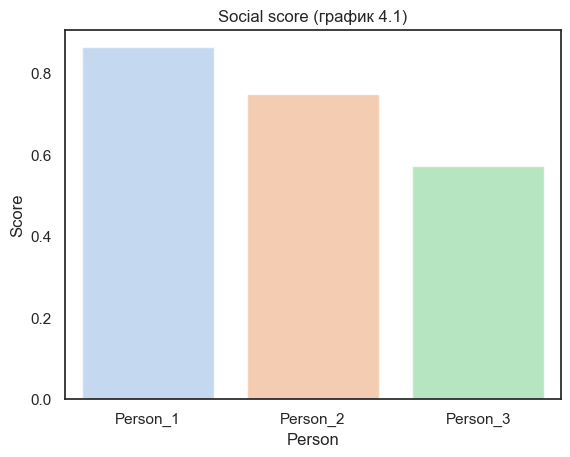

In [69]:
# Создаем график: Social score, на который выводим параметры социальной активности всех людей
sns.set_theme(style="white", palette='pastel')
sns.barplot(data=social_score, x='Person', 
                    y='Score', alpha=0.7).set_title('Social score (график 4.1)')
plt.show()

## Вывод: самый социально активный: человек 1, затем человек 2, и самый менее социально активный: человек 3